Text(0.5, 1.0, 'Label 8')

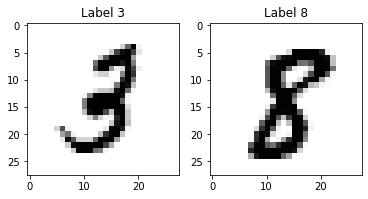

In [1]:
# https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Randomly select 1000 samples for performance reasons
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], 1000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]

# Show two example images
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')
ax[0].set_title("Label 3")
ax[1].set_title("Label 8")

In [3]:
print(X.shape,y.shape,np.unique(y))

(1000, 784) (1000,) ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


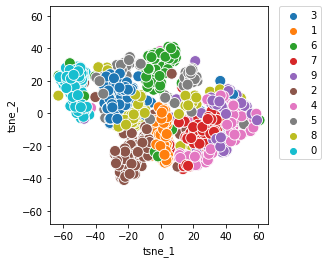

In [4]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)